In [1]:
import numpy as np
import pandas as pd

import sys, os, time
import glob

from matplotlib import pyplot as plt
%matplotlib inline

# these magics ensure that external modules that are modified are also automatically reloaded
%load_ext autoreload
%autoreload 2

# widgets and interaction
from ipywidgets import FloatProgress
from IPython.display import display, clear_output

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

from skimage.io import imread, imsave

import warnings
warnings.filterwarnings('ignore')

import gzip
import cPickle as pickle

In [2]:
import re
def parse_list(s):
    s = re.sub('\s+', ' ', s[1:-1]).strip().replace(",",' ')
    s = re.sub('\s+', ' ', s)
    # print s.split(" ")
    if len(s.split(" "))>0:
        ret = [float(n.strip()) for n in s.split(" ")]
    return ret

# Real cities

In [3]:
files_df = pd.read_csv("/home/data/world-cities/urban_areas_over_10kpop_stats.csv")
cols_to_parse = ["patch distr", "top patch areas"]
for c in files_df.columns:
    if len([x for x in cols_to_parse if x in c])>0:
        files_df[c] = files_df[c].apply(parse_list)
files_df.head(2)

,Unnamed: 0,filename,class,country,population,city,phase,region,build pct 128,patch distr 128,...,top patch areas 128,build pct 448,patch distr 448,fractal dim 448,top patch areas 448,build pct 64,patch distr 64,fractal dim 64,top patch areas 64,decile
0,0,/home/data/world-cities//train/medium/SAR_in_i...,medium,in,100585,"itarsi, in (pop 100.6k)",train,Asia,0.011440,"[0.0, 0.69314718, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",...,"[4.0, 4.0, 3.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",0.005256,"[3.17805383, 1.79175947, 2.19722458, 0.6931471...",1.171774,"[292.0, 28.0, 26.0, 24.0, 22.0, 18.0, 16.0, 15...",0.012975,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.987537,"[7.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",3
1,1,/home/data/world-cities//train/medium/SAR_co_s...,medium,co,126553,"sogamoso, co (pop 126.6k)",train,Americas,0.003207,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.001794,"[2.56494936, 1.60943791, 1.38629436, 1.0986122...",0.832452,"[53.0, 35.0, 26.0, 13.0, 10.0, 10.0, 9.0, 8.0,...",0.002289,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.683710,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [4]:
files_df.columns

Index([u'Unnamed: 0', u'filename', u'class', u'country', u'population',
       u'city', u'phase', u'region', u'build pct 128', u'patch distr 128',
       u'fractal dim 128', u'top patch areas 128', u'build pct 448',
       u'patch distr 448', u'fractal dim 448', u'top patch areas 448',
       u'build pct 64', u'patch distr 64', u'fractal dim 64',
       u'top patch areas 64', u'decile'],
      dtype='object')

### Avg built area

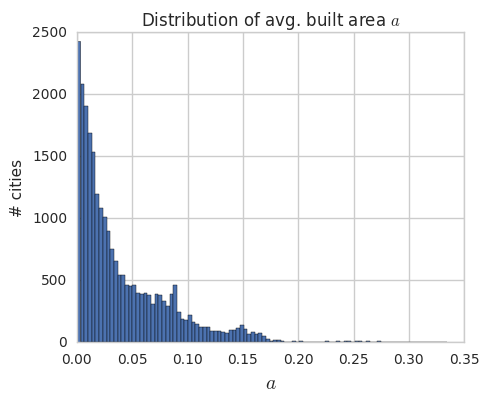

In [5]:
files_df['build pct 128'].hist(bins=100, figsize=(5,4))
plt.title("Distribution of avg. built area $a$")
plt.xlabel("$a$", fontsize=14)
plt.ylabel("# cities")

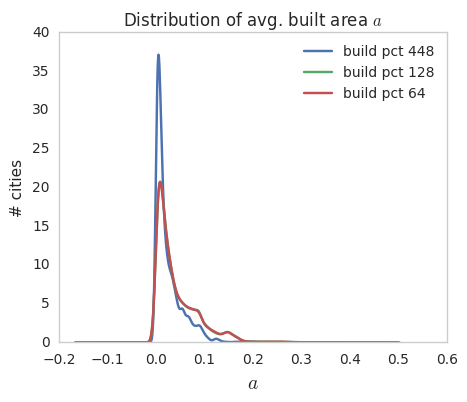

In [6]:
files_df['build pct 448'].plot.kde(figsize=(5,4))
files_df['build pct 128'].plot.kde(figsize=(5,4))
files_df['build pct 64'].plot.kde()
plt.legend(loc="best")

plt.title("Distribution of avg. built area $a$")
plt.xlabel("$a$", fontsize=14)
plt.ylabel("# cities")

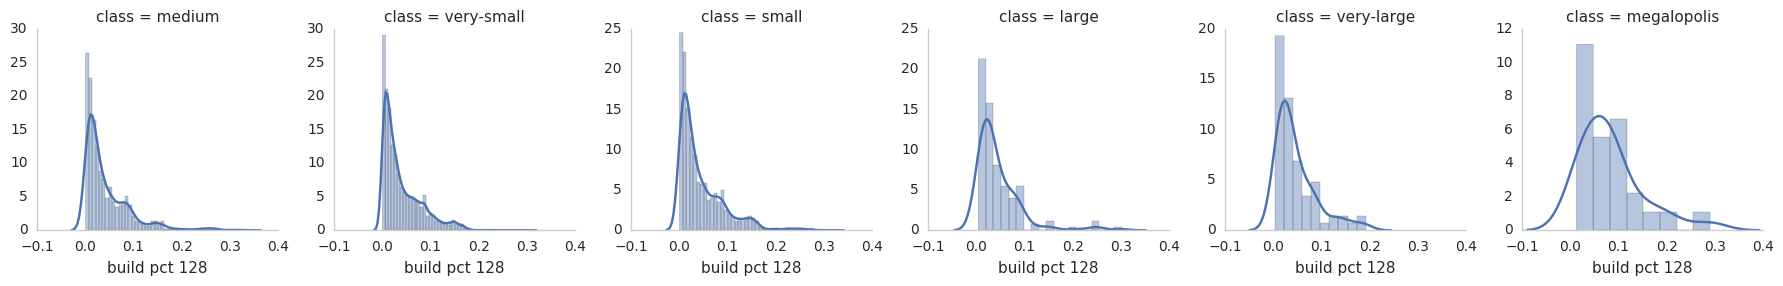

In [7]:
g = sns.FacetGrid(files_df, col="class", margin_titles=True, sharey=False)
g.map(sns.distplot, "build pct 128")


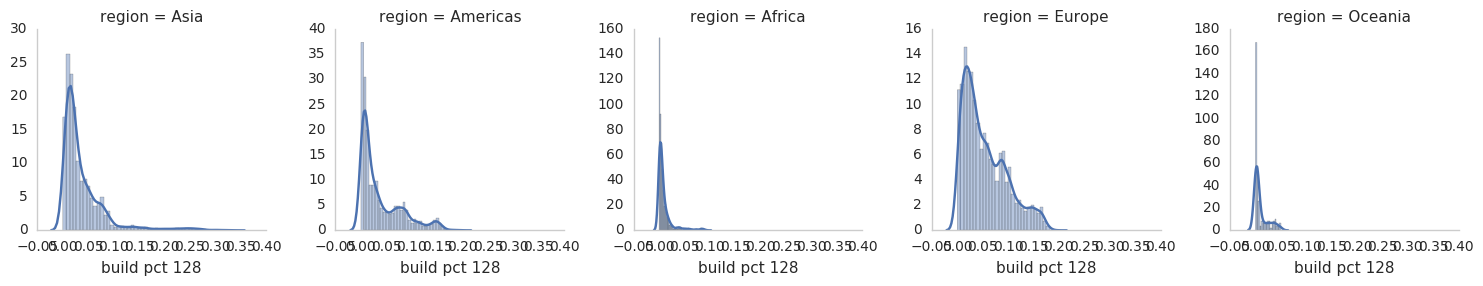

In [8]:
g = sns.FacetGrid(files_df, col="region", margin_titles=True, sharey=False)
g.map(sns.distplot, "build pct 128")

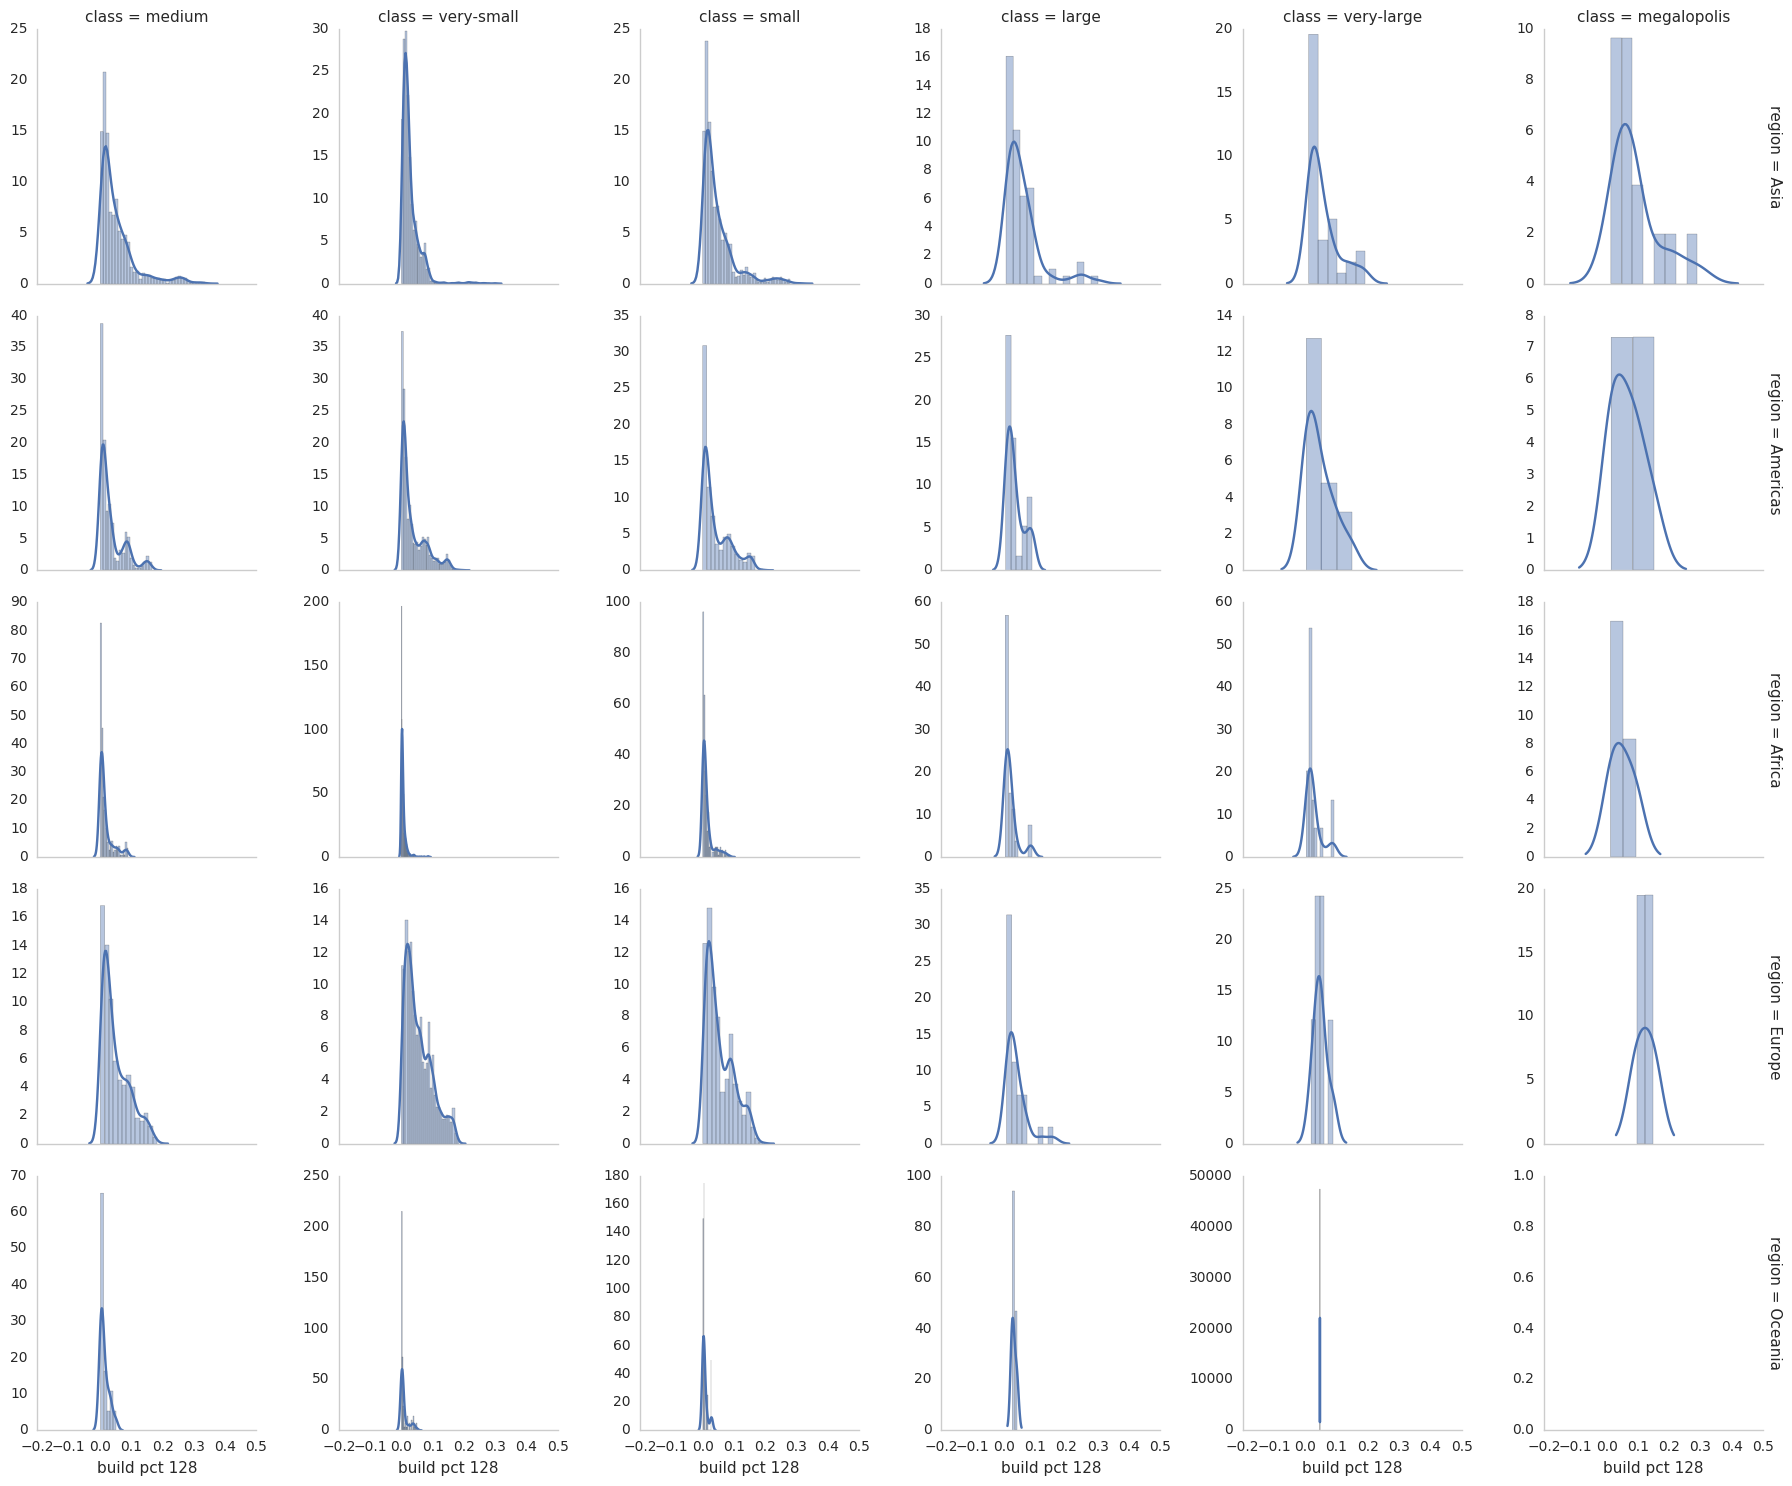

In [9]:
g = sns.FacetGrid(files_df, col="class", row="region", margin_titles=True, sharey=False)
g.map(sns.distplot, "build pct 128")


### Fractal dimension

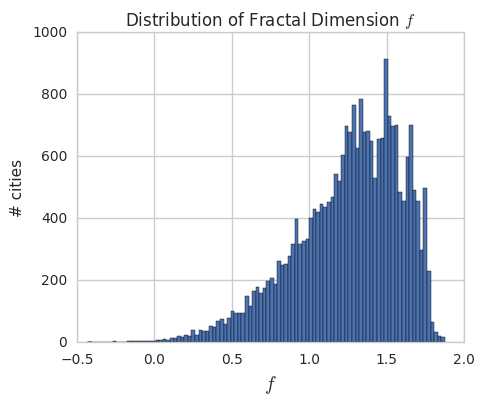

In [10]:
files_df['fractal dim 448'].hist(bins=100, figsize=(5,4))
plt.title("Distribution of Fractal Dimension $f$")
plt.xlabel("$f$", fontsize=14)
plt.ylabel("# cities")

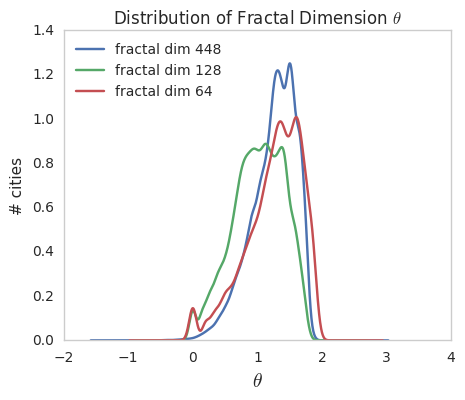

In [11]:
files_df['fractal dim 448'].plot.kde(figsize=(5,4))
files_df['fractal dim 128'].plot.kde(figsize=(5,4))
files_df['fractal dim 64'].plot.kde()
plt.legend(loc="best")

plt.title("Distribution of Fractal Dimension $\\theta$")
plt.xlabel("$\\theta$", fontsize=14)
plt.ylabel("# cities")

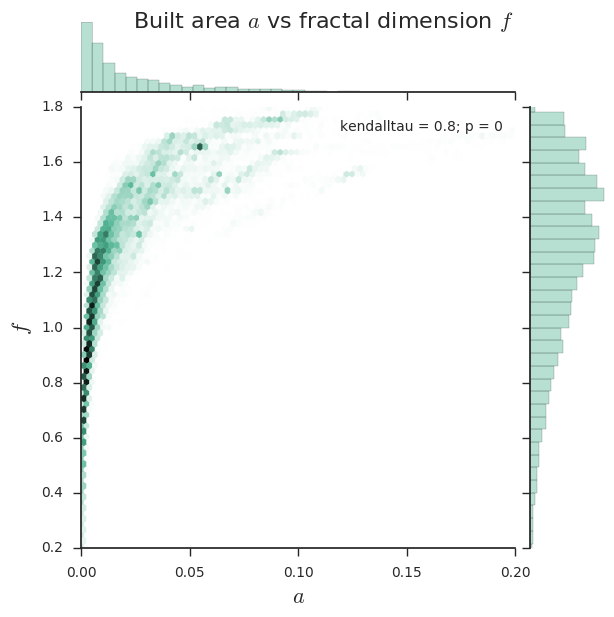

In [12]:
from scipy.stats import kendalltau
sns.set(style="ticks")

g = sns.jointplot(files_df['build pct 448'].values, 
              files_df['fractal dim 448'].values, xlim=(0,0.2), ylim=(0.2,1.8),
              kind="hex", stat_func=kendalltau, color="#4CB391")
g.fig.suptitle("Built area $a$ vs fractal dimension $f$", fontsize=16)
g.ax_joint.set_xlabel("$a$", fontsize=16)
g.ax_joint.set_ylabel("$f$", fontsize=16)

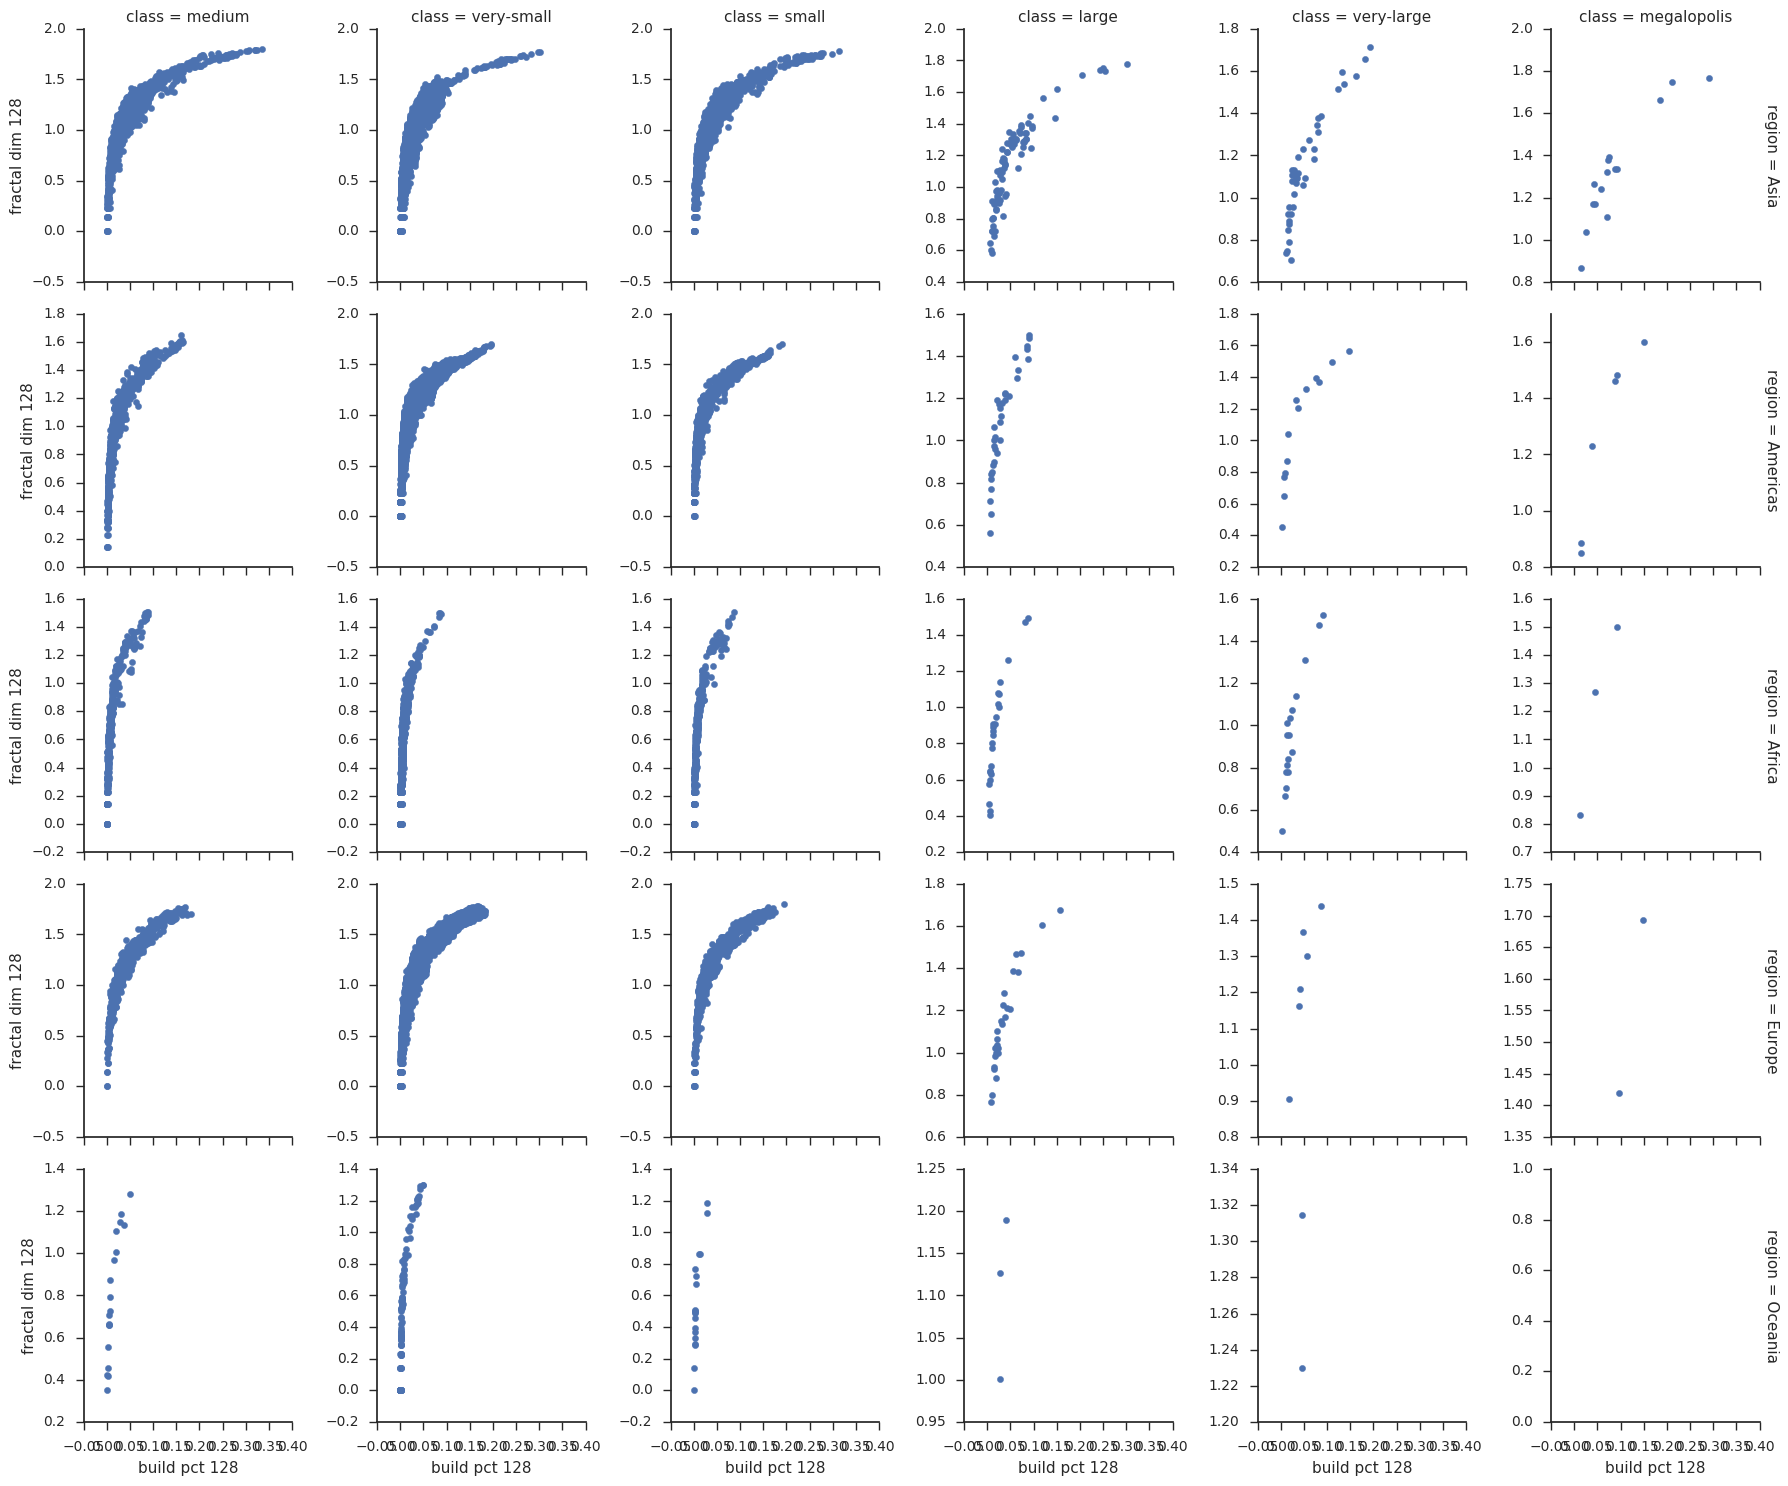

In [13]:
g = sns.FacetGrid(files_df, col="class", row="region", margin_titles=True, sharey=False)
g.map(sns.plt.scatter, "build pct 128", "fractal dim 128")


### Focus on images with more than 2% built fraction

In [14]:
files_df_sel = files_df[files_df['build pct 128']>0.02]

print len(files_df_sel)

14158


### Distribution of patch areas

In [42]:
bins = np.logspace(1, 9, 20, base=np.exp(1))

In [15]:
area_counts = np.array([list(x) for x in files_df_sel['patch distr 448']])
area_counts.shape, (area_counts.sum(1)>0).sum()

((14158, 19), 14158)

In [33]:
area_counts_df = pd.DataFrame(np.vstack([
    area_counts.flatten(), np.tile(range(area_counts.shape[1]), area_counts.shape[0]).astype(int)])).T
area_counts_df.columns = ['log-count', 'bin']
area_counts_df['bin'] = area_counts_df['bin'].astype(int)

area_counts_df.shape

(269002, 2)

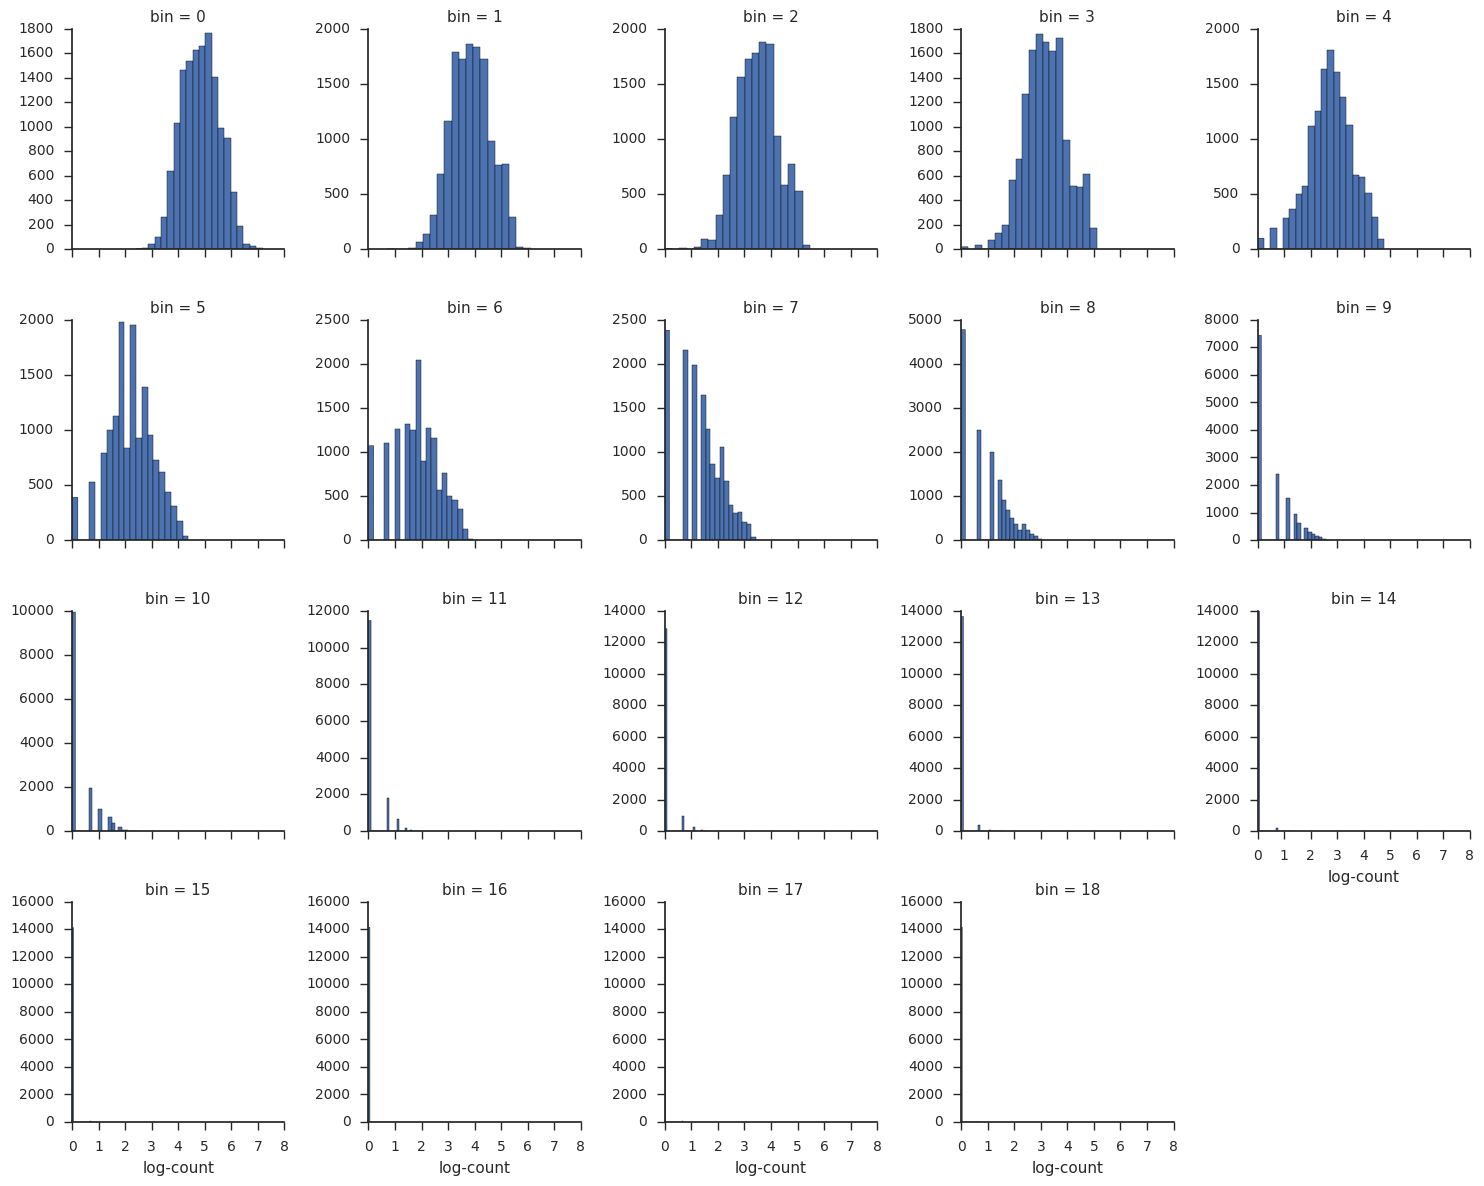

In [40]:
g = sns.FacetGrid(area_counts_df, col="bin", col_wrap=5, margin_titles=True, sharey=False)
g.map(sns.plt.hist, "log-count", bins=20)

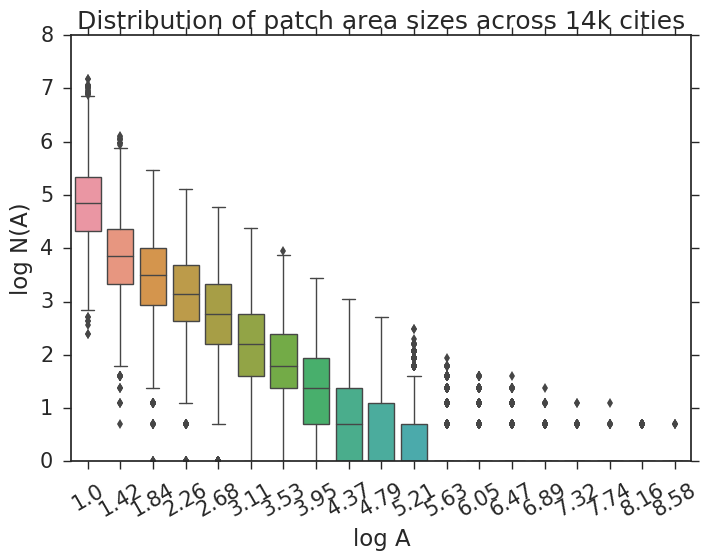

In [55]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

g = sns.boxplot(data=area_counts_df, y="log-count", x="bin")
_ = g.set_xticklabels(np.log(bins).round(2), rotation=30)
g.set_xlabel("log A")
g.set_ylabel("log N(A)")
g.set_title("Distribution of patch area sizes across 14k cities")

### Top 20 patches by area

In [54]:
top_areas = np.array([list(x) for x in files_df_sel['top patch areas 448']])
(top_areas.sum(1)>0).sum()

14158

In [66]:
top_areas_df = pd.DataFrame(np.vstack([
    np.log(top_areas.flatten() / float(448*448)), np.tile(range(top_areas.shape[1]), top_areas.shape[0]).astype(int)])).T
top_areas_df.columns = ['patch area', 'rank']
top_areas_df['rank'] = top_areas_df['rank'].astype(int)

top_areas_df.shape

(283160, 2)

In [67]:
top_areas_df.head()

,patch area,rank
0,-4.304514,0
1,-7.584614,1
2,-7.604416,2
3,-7.990079,3
4,-8.184235,4


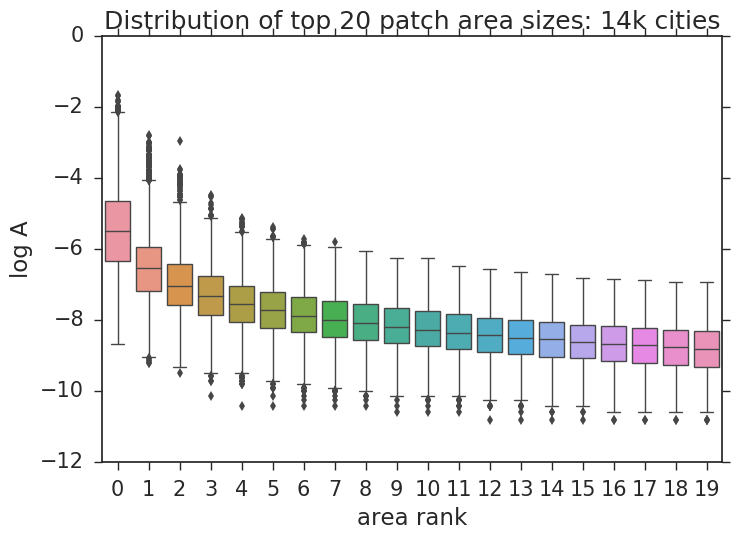

In [68]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

g = sns.boxplot(data=top_areas_df, y="patch area", x="rank")
g.set_xlabel('area rank')
g.set_ylabel("log A")
g.set_title("Distribution of top 20 patch area sizes: 14k cities")

# Simulations

* Explore parameter space of the simulations: $\gamma_r$, $\gamma_u$, $\theta$, $t$ etc.

* 

In [69]:
files_df = pd.read_csv("/home/data/world-cities/simulations_stats.csv")
cols_to_parse = ["patch distr", "top patch areas"]
for c in files_df.columns:
    if len([x for x in cols_to_parse if x in c])>0:
        files_df[c] = files_df[c].apply(parse_list)
files_df.head(2)

,Unnamed: 0,filename,Ue,gu,gr,theta,n,t,phase,build pct 128,patch distr 128,fractal dim 128,build pct 448,patch distr 448,fractal dim 448,build pct 64,patch distr 64,fractal dim 64
0,0,/home/data/world-cities//simulations/Hu40_Gu2....,40,2.0,2.0,0.05,0,48,train,0.054465,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.461190,0.054100,"[5.47646355, 4.61512052, 4.62497281, 3.8066624...",1.546551,0.053816,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.301345
1,1,/home/data/world-cities//simulations/Hu40_Gu2....,40,2.0,2.0,0.05,0,33,train,0.038195,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.349825,0.038211,"[5.14749448, 4.4543473, 4.26267988, 3.49650756...",1.487812,0.036785,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.149185


In [70]:
files_df.shape

(417825, 18)

In [71]:
files_sel = files_df[files_df['theta']>0.02]\
    .groupby(['Ue', 'gu', 'gr', 'theta', 'n', 'phase'], group_keys=False)\
    .apply(lambda x: x.sort('t', ascending=False).iloc[:(len(x)/2):5])


In [ ]:
# MPO San Diego, Joan Walker

# 